# K-Nearest Neighbor(KNN) Algorithm for Machine Learning
- K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
- K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
- It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
-  algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

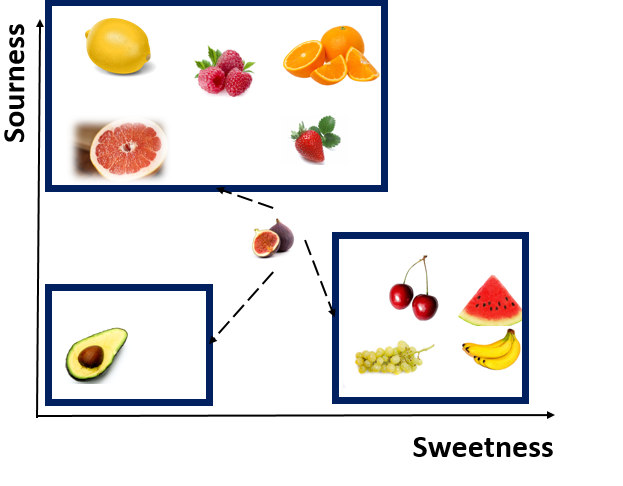

**Step-1:** Select the number K of the neighbors

**Step-2:** Calculate the Euclidean distance of K number of neighbors

**Step-3:** Take the K nearest neighbors as per the calculated Euclidean distance.

**Step-4:** Among these k neighbors, count the number of the data points in each category.

**Step-5:** Assign the new data points to that category for which the number of the neighbor is maximum.

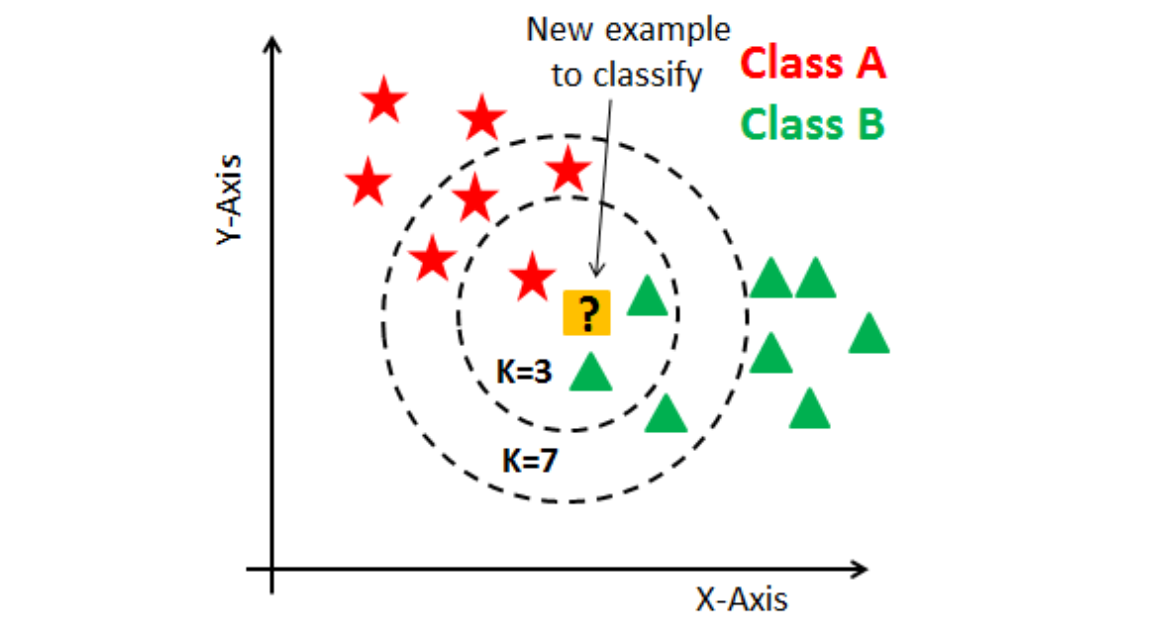

we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as:

$$ Euclidean Distance = \sqrt{(x_2 -x_1)^2+(y_2-y_1)^2} $$
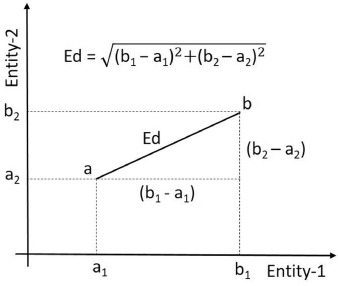

- There is no particular way to determine the best value for "K", so we need to try some values to find the best out of them. The most preferred value for K is 3 and 7.
- A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.
- Large values for K are good, but it may find some difficulties.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

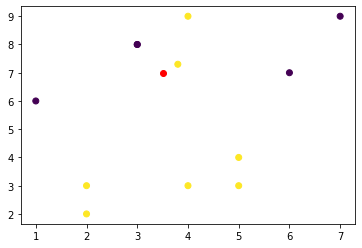

In [4]:
dff = pd.DataFrame({
'x' : [1,2,3,4,5,6,7,5,2,3,4,3.8],
'y' : [6,3,8,9,3,7,9,4,2,8,3,7.3],
'z' : [0,1,0,1,1,0,0,1,1,0,1,1]})
plt.scatter(dff['x'],dff['y'],c=dff['z'])
plt.scatter(3.5,7,color='r')

In [9]:
#(3,8) (4,9)
def ed(x1,x2,z1,z2):
    return np.sqrt((x2-x1)**2 +(z2-z1)**2)
ed(3.5,7,3,8)

6.103277807866851

In [10]:
ed(3.5,7,3.8,7.3)

4.949747468305833

In [11]:
np.argmin([6.1,4.9])

1

# Customer Purchase

In [12]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [13]:
df.drop(columns='User ID',inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
lb = LabelEncoder()
sc = StandardScaler()
df['Gender'] = lb.fit_transform(df['Gender'])
df[['Age','EstimatedSalary']] = sc.fit_transform(df[['Age','EstimatedSalary']])

In [15]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0
...,...,...,...,...
395,0,0.797057,-0.844019,1
396,1,1.274623,-1.372587,1
397,0,1.179110,-1.460681,1
398,1,-0.158074,-1.078938,0


In [37]:
ind = df.iloc[:,:3]
dep = df.iloc[:,-1]
dep

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [38]:
ind

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751
...,...,...,...
395,0,0.797057,-0.844019
396,1,1.274623,-1.372587
397,0,1.179110,-1.460681
398,1,-0.158074,-1.078938


In [39]:
xx = df.iloc
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.2,random_state=0)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [58]:
testing = pd.DataFrame({
    'y' : y_test,
    'y_hat' : knn.predict(x_test)
})
testing.sample(8)

,y,y_hat
196,0,0
179,0,0
280,1,0
171,0,1
334,1,1
344,1,1
272,1,1
322,0,0


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,knn.predict(x_test))

array([[55,  3],
       [ 3, 19]])

### Advantages of KNN Algorithm:
- It is simple to implement.
- It is robust to the noisy training data
- It can be more effective if the training data is large.

### Disadvantages of KNN Algorithm:
- Always needs to determine the value of K which may be complex some time.
- The computation cost is high because of calculating the distance between the data points for all the training samples.